Start of Ant Colony Optimization - Second Study Case


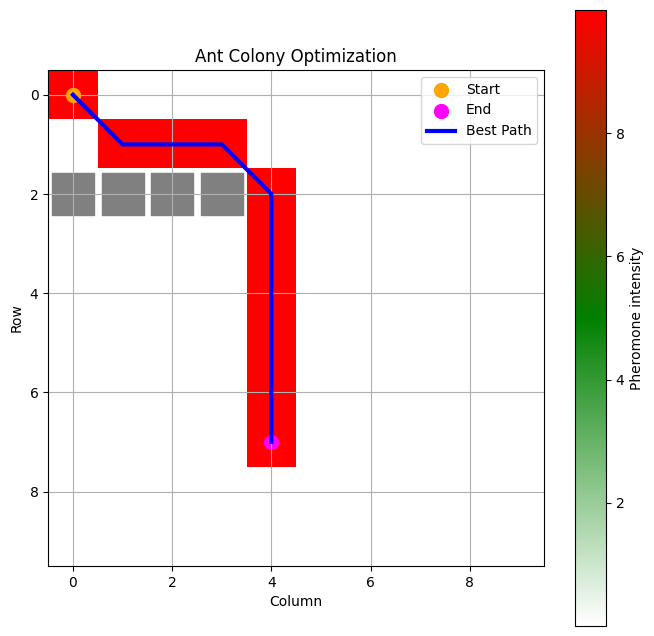

End of Ant Colony Optimization
Best path:  [(0, 0), (1, 1), (2, 1), (3, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7)]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
np.random.seed(42)
class AntColonyOptimization:
    def __init__(self, start, end, obstacles, grid_size=(10, 10), num_ants=10, evaporation_rate=0.1, alpha=0.1, beta=15):
        self.start = start
        self.end = end
        self.obstacles = obstacles
        self.grid_size = grid_size
        self.num_ants = num_ants
        self.evaporation_rate = evaporation_rate
        self.alpha = alpha
        self.beta = beta
        self.pheromones = np.ones(grid_size)
        self.best_path = None

    def _get_neighbors(self, position):
        pos_x, pos_y = position
        neighbors = []
        for i in range(-1, 2):
            for j in range(-1, 2):
                new_x, new_y = pos_x + i, pos_y + j
                if (0 <= new_x < self.grid_size[0] and 0 <= new_y < self.grid_size[1] and
                        (new_x, new_y) != position and (new_x, new_y) not in self.obstacles):
                    neighbors.append((new_x, new_y))
        return neighbors

    def _select_next_position(self, position, visited):
        neighbors = self._get_neighbors(position)
        probabilities = []
        total = 0
        for neighbor in neighbors:
            if neighbor not in visited:
                pheromone = self.pheromones[neighbor[1], neighbor[0]]
                heuristic = 1 / (np.linalg.norm(np.array(neighbor) - np.array(self.end)) + 0.1)
                probabilities.append((neighbor, pheromone ** self.alpha * heuristic ** self.beta))
                total += pheromone ** self.alpha * heuristic ** self.beta
        if not probabilities:
            return None
        probabilities = [(pos, prob / total) for pos, prob in probabilities]
        #selected = np.random.choice(len(probabilities), p=[prob for pos, prob in probabilities])
        selected = np.argmax([prob for pos, prob in probabilities])
        return probabilities[selected][0]

    def _evaporate_pheromones(self):
        self.pheromones *= (1 - self.evaporation_rate)

    def _deposit_pheromones(self, path):
        for position in path:
            self.pheromones[position[1], position[0]] += 1

    def find_best_path(self, num_iterations):
        for _ in range(num_iterations):
            all_paths = []
            for _ in range(self.num_ants):
                current_position = self.start
                path = [current_position]
                while current_position != self.end:
                    next_position = self._select_next_position(current_position, path)
                    if next_position is None:
                        break
                    path.append(next_position)
                    current_position = next_position
                all_paths.append(path)

            # Escoger el mejor camino por su tamaño?
            # --------------------------
            all_paths.sort(key=lambda x: len(x))
            best_path = all_paths[0]

            self._evaporate_pheromones()
            self._deposit_pheromones(best_path)

            if self.best_path is None or len(best_path) < len(self.best_path) and best_path[-1] == self.end:
                self.best_path = best_path
            # --------------------------

    def plot(self):
        cmap = LinearSegmentedColormap.from_list('pheromone', ['white', 'green', 'red'])
        plt.figure(figsize=(8, 8))
        plt.imshow(self.pheromones, cmap=cmap, vmin=np.min(self.pheromones), vmax=np.max(self.pheromones))
        plt.colorbar(label='Pheromone intensity')
        plt.scatter(self.start[0], self.start[1], color='orange', label='Start', s=100)
        plt.scatter(self.end[0], self.end[1], color='magenta', label='End', s=100)
        for obstacle in self.obstacles:
            plt.scatter(obstacle[0], obstacle[1], color='gray', s=900, marker='s')
        if self.best_path:
            path_x, path_y = zip(*self.best_path)
            plt.plot(path_x, path_y, color='blue', label='Best Path', linewidth=3)
        plt.xlabel('Column')
        plt.ylabel('Row')
        plt.title('Ant Colony Optimization')
        plt.legend()
        plt.grid(True)
        plt.show()

def study_case_1():
    print("Start of Ant Colony Optimization - First Study Case")
    start = (0, 0)
    end = (4, 7)
    obstacles = [(1, 2), (2, 2), (3, 2)]
    aco = AntColonyOptimization(start, end, obstacles)
    aco.find_best_path(100)
    aco.plot()
    print("End of Ant Colony Optimization")
    print("Best path: ", aco.best_path)

def study_case_2():
    print("Start of Ant Colony Optimization - Second Study Case")
    start = (0, 0)
    end = (4, 7)
    obstacles = [(0, 2), (1, 2), (2, 2), (3, 2)]
    aco = AntColonyOptimization(start, end, obstacles)
    aco.find_best_path(100)
    aco.plot()
    print("End of Ant Colony Optimization")
    print("Best path: ", aco.best_path)

if __name__ == '__main__':
    # study_case_1()
      study_case_2()





Se agrega el siguiente código para probar diferentes valores de alfa y beta.

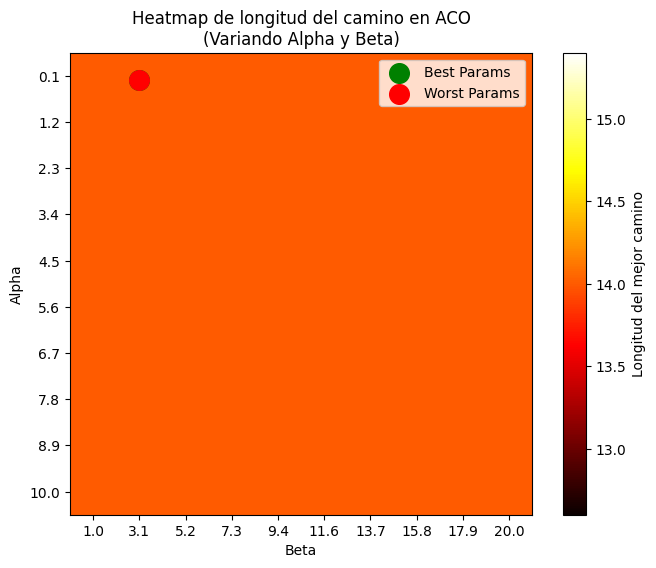

Start of Ant Colony Optimization - Second Study Case
Best Path Length with Best Parameters:  14


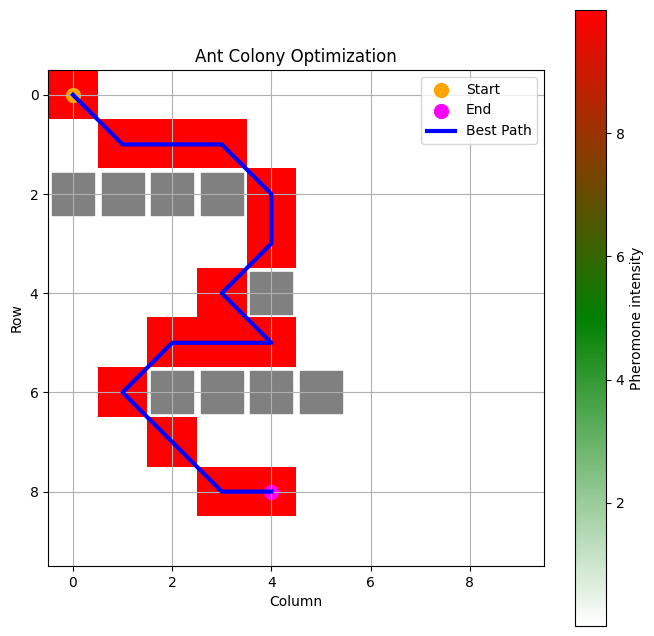

Best Path Length with Worst Parameters:  14


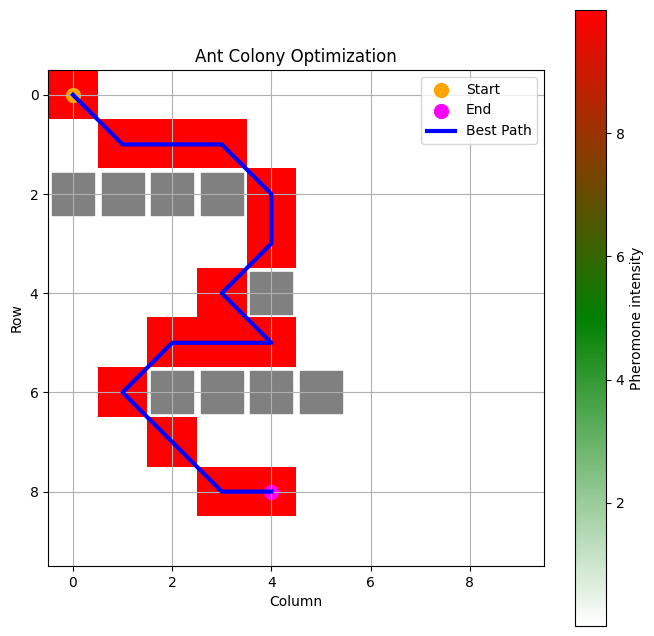

End of Ant Colony Optimization


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

np.random.seed(42)

np.random.seed(42)

class AntColonyOptimization:
    def __init__(self, start, end, obstacles, grid_size=(10, 10), num_ants=10, evaporation_rate=0.1, alpha=0.1, beta=15):
        self.start = start
        self.end = end
        self.obstacles = obstacles
        self.grid_size = grid_size
        self.num_ants = num_ants
        self.evaporation_rate = evaporation_rate
        self.alpha = alpha
        self.beta = beta
        self.pheromones = np.ones(grid_size)
        self.best_path = None

    def _get_neighbors(self, position):
        pos_x, pos_y = position
        neighbors = []
        for i in range(-1, 2):
            for j in range(-1, 2):
                new_x, new_y = pos_x + i, pos_y + j
                if (0 <= new_x < self.grid_size[0] and 0 <= new_y < self.grid_size[1] and
                        (new_x, new_y) != position and (new_x, new_y) not in self.obstacles):
                    neighbors.append((new_x, new_y))
        return neighbors

    def _select_next_position(self, position, visited):
        neighbors = self._get_neighbors(position)
        probabilities = []
        total = 0
        for neighbor in neighbors:
            if neighbor not in visited:
                pheromone = self.pheromones[neighbor[1], neighbor[0]]
                heuristic = 1 / (np.linalg.norm(np.array(neighbor) - np.array(self.end)) + 0.1)
                probabilities.append((neighbor, pheromone ** self.alpha * heuristic ** self.beta))
                total += pheromone ** self.alpha * heuristic ** self.beta
        if not probabilities:
            return None
        probabilities = [(pos, prob / total) for pos, prob in probabilities]
        selected = np.argmax([prob for pos, prob in probabilities])
        return probabilities[selected][0]

    def _evaporate_pheromones(self):
        self.pheromones *= (1 - self.evaporation_rate)

    def _deposit_pheromones(self, path):
        for position in path:
            self.pheromones[position[1], position[0]] += 1

    def find_best_path(self, num_iterations):
        for _ in range(num_iterations):
            all_paths = []
            for _ in range(self.num_ants):
                current_position = self.start
                path = [current_position]
                while current_position != self.end:
                    next_position = self._select_next_position(current_position, path)
                    if next_position is None:
                        break
                    path.append(next_position)
                    current_position = next_position
                all_paths.append(path)

            all_paths.sort(key=lambda x: len(x))
            best_path = all_paths[0]

            self._evaporate_pheromones()
            self._deposit_pheromones(best_path)

            if self.best_path is None or (len(best_path) < len(self.best_path) and best_path[-1] == self.end):
                self.best_path = best_path

        # Devolver la longitud del mejor camino encontrado
        if self.best_path and self.best_path[-1] == self.end:
            return len(self.best_path)
        else:
            return np.inf  # Si no se encuentra un camino, devolver infinito

    def plot(self):
        cmap = LinearSegmentedColormap.from_list('pheromone', ['white', 'green', 'red'])
        plt.figure(figsize=(8, 8))
        plt.imshow(self.pheromones, cmap=cmap, vmin=np.min(self.pheromones), vmax=np.max(self.pheromones))
        plt.colorbar(label='Pheromone intensity')
        plt.scatter(self.start[0], self.start[1], color='orange', label='Start', s=100)
        plt.scatter(self.end[0], self.end[1], color='magenta', label='End', s=100)
        for obstacle in self.obstacles:
            plt.scatter(obstacle[0], obstacle[1], color='gray', s=900, marker='s')
        if self.best_path:
            path_x, path_y = zip(*self.best_path)
            plt.plot(path_x, path_y, color='blue', label='Best Path', linewidth=3)
        plt.xlabel('Column')
        plt.ylabel('Row')
        plt.title('Ant Colony Optimization')
        plt.legend()
        plt.grid(True)
        plt.show()

def create_heatmap():
    start = (0, 0)
    end = (4, 8)
    obstacles = [(0, 2), (1, 2), (2, 2), (3, 2), (2, 6), (3, 6), (4, 6), (5, 6), (4, 4)]
    grid_size = (10, 10)
    num_iterations = 100
    num_ants = 10
    
    alpha_values = np.linspace(0.1, 10, 10)
    beta_values = np.linspace(1, 20, 10)
    heatmap_data = np.zeros((len(alpha_values), len(beta_values)))

    for i, alpha in enumerate(alpha_values):
        for j, beta in enumerate(beta_values):
            aco = AntColonyOptimization(start, end, obstacles, grid_size, num_ants, alpha=alpha, beta=beta)
            best_path_length = aco.find_best_path(num_iterations)
            heatmap_data[i, j] = best_path_length  # Almacenar la longitud del mejor camino

    # Graficar el heatmap
    plt.figure(figsize=(8, 6))
    plt.title("Heatmap de longitud del camino en ACO\n(Variando Alpha y Beta)")
    plt.xlabel("Beta")
    plt.ylabel("Alpha")
    plt.xticks(ticks=np.arange(len(beta_values)), labels=np.round(beta_values, 1))
    plt.yticks(ticks=np.arange(len(alpha_values)), labels=np.round(alpha_values, 1))
    heatmap = plt.imshow(heatmap_data, cmap="hot", interpolation="nearest")
    plt.colorbar(heatmap, label="Longitud del mejor camino")
    plt.show()
    
    # Obtener el mejor y peor alpha y beta
    best_indices = np.unravel_index(np.argmin(heatmap_data), heatmap_data.shape)
    worst_indices = np.unravel_index(np.argmax(heatmap_data), heatmap_data.shape)

    best_alpha = alpha_values[best_indices[0]]
    best_beta = beta_values[best_indices[1]]
    
    worst_alpha = alpha_values[worst_indices[0]]
    worst_beta = beta_values[worst_indices[1]]

    print(f"Mejor Alpha: {best_alpha}, Mejor Beta: {best_beta}")
    print(f"Peor Alpha: {worst_alpha}, Peor Beta: {worst_beta}")

    return (best_alpha, best_beta), (worst_alpha, worst_beta)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

np.random.seed(42)

class AntColonyOptimization:
    def __init__(self, start, end, obstacles, grid_size=(10, 10), num_ants=10, evaporation_rate=0.1, alpha=0.1, beta=15):
        self.start = start
        self.end = end
        self.obstacles = obstacles
        self.grid_size = grid_size
        self.num_ants = num_ants
        self.evaporation_rate = evaporation_rate
        self.alpha = alpha
        self.beta = beta
        self.pheromones = np.ones(grid_size)
        self.best_path = None

    def _get_neighbors(self, position):
        pos_x, pos_y = position
        neighbors = []
        for i in range(-1, 2):
            for j in range(-1, 2):
                new_x, new_y = pos_x + i, pos_y + j
                if (0 <= new_x < self.grid_size[0] and 0 <= new_y < self.grid_size[1] and
                        (new_x, new_y) != position and (new_x, new_y) not in self.obstacles):
                    neighbors.append((new_x, new_y))
        return neighbors

    def _select_next_position(self, position, visited):
        neighbors = self._get_neighbors(position)
        probabilities = []
        total = 0
        for neighbor in neighbors:
            if neighbor not in visited:
                pheromone = self.pheromones[neighbor[1], neighbor[0]]
                heuristic = 1 / (np.linalg.norm(np.array(neighbor) - np.array(self.end)) + 0.1)
                probabilities.append((neighbor, pheromone ** self.alpha * heuristic ** self.beta))
                total += pheromone ** self.alpha * heuristic ** self.beta
        if not probabilities:
            return None
        probabilities = [(pos, prob / total) for pos, prob in probabilities]
        selected = np.argmax([prob for pos, prob in probabilities])
        return probabilities[selected][0]

    def _evaporate_pheromones(self):
        self.pheromones *= (1 - self.evaporation_rate)

    def _deposit_pheromones(self, path):
        for position in path:
            self.pheromones[position[1], position[0]] += 1

    def find_best_path(self, num_iterations):
        for _ in range(num_iterations):
            all_paths = []
            for _ in range(self.num_ants):
                current_position = self.start
                path = [current_position]
                while current_position != self.end:
                    next_position = self._select_next_position(current_position, path)
                    if next_position is None:
                        break
                    path.append(next_position)
                    current_position = next_position
                all_paths.append(path)

            all_paths.sort(key=lambda x: len(x))
            best_path = all_paths[0]

            self._evaporate_pheromones()
            self._deposit_pheromones(best_path)

            if self.best_path is None or (len(best_path) < len(self.best_path) and best_path[-1] == self.end):
                self.best_path = best_path

        # Devolver la longitud del mejor camino encontrado
        if self.best_path and self.best_path[-1] == self.end:
            return len(self.best_path)
        else:
            return np.inf  # Si no se encuentra un camino, devolver infinito

    def plot(self):
        cmap = LinearSegmentedColormap.from_list('pheromone', ['white', 'green', 'red'])
        plt.figure(figsize=(8, 8))
        plt.imshow(self.pheromones, cmap=cmap, vmin=np.min(self.pheromones), vmax=np.max(self.pheromones))
        plt.colorbar(label='Pheromone intensity')
        plt.scatter(self.start[0], self.start[1], color='orange', label='Start', s=100)
        plt.scatter(self.end[0], self.end[1], color='magenta', label='End', s=100)
        for obstacle in self.obstacles:
            plt.scatter(obstacle[0], obstacle[1], color='gray', s=900, marker='s')
        if self.best_path:
            path_x, path_y = zip(*self.best_path)
            plt.plot(path_x, path_y, color='blue', label='Best Path', linewidth=3)
        plt.xlabel('Column')
        plt.ylabel('Row')
        plt.title('Ant Colony Optimization')
        plt.legend()
        plt.grid(True)
        plt.show()

def create_heatmap():
    start = (0, 0)
    end = (4, 8)
    obstacles = [(0, 2), (1, 2), (2, 2), (3, 2), (2, 6), (3, 6), (4, 6), (5, 6), (4, 4)]
    grid_size = (10, 10)
    num_iterations = 100
    num_ants = 10
    
    alpha_values = np.linspace(0.1, 10, 10)
    beta_values = np.linspace(1, 20, 10)
    heatmap_data = np.zeros((len(alpha_values), len(beta_values)))

    best_length = np.inf
    worst_length = -np.inf
    best_params = None
    worst_params = None

    for i, alpha in enumerate(alpha_values):
        for j, beta in enumerate(beta_values):
            aco = AntColonyOptimization(start, end, obstacles, grid_size, num_ants, alpha=alpha, beta=beta)
            best_path_length = aco.find_best_path(num_iterations)
            heatmap_data[i, j] = best_path_length  # Almacenar la longitud del mejor camino

            # Actualizar mejor y peor longitud de camino
            if best_path_length < best_length:
                best_length = best_path_length
                best_params = (alpha, beta)
            if best_path_length > worst_length:
                worst_length = best_path_length
                worst_params = (alpha, beta)

    # Graficar el heatmap
    plt.figure(figsize=(8, 6))
    plt.title("Heatmap de longitud del camino en ACO\n(Variando Alpha y Beta)")
    plt.xlabel("Beta")
    plt.ylabel("Alpha")
    plt.xticks(ticks=np.arange(len(beta_values)), labels=np.round(beta_values, 1))
    plt.yticks(ticks=np.arange(len(alpha_values)), labels=np.round(alpha_values, 1))
    heatmap = plt.imshow(heatmap_data, cmap="hot", interpolation="nearest")
    plt.colorbar(heatmap, label="Longitud del mejor camino")
    plt.scatter(best_params[1], best_params[0], color='green', s=200, label='Best Params')
    plt.scatter(worst_params[1], worst_params[0], color='red', s=200, label='Worst Params')
    plt.legend()
    plt.show()

    return best_params, worst_params

def study_case_2(best_params, worst_params):
    print("Start of Ant Colony Optimization - Second Study Case")
    
    start = (0, 0)
    end = (4, 8)
    obstacles = [(0, 2), (1, 2), (2, 2), (3, 2), (2, 6), (3, 6), (4, 6), (5, 6), (4, 4)]
    
    # Resolver con los mejores parámetros
    aco_best = AntColonyOptimization(start, end, obstacles, alpha=best_params[0], beta=best_params[1])
    best_path_length = aco_best.find_best_path(100)
    print("Best Path Length with Best Parameters: ", best_path_length)
    aco_best.plot()

    # Resolver con los peores parámetros
    aco_worst = AntColonyOptimization(start, end, obstacles, alpha=worst_params[0], beta=worst_params[1])
    worst_path_length = aco_worst.find_best_path(100)
    print("Best Path Length with Worst Parameters: ", worst_path_length)
    aco_worst.plot()

    print("End of Ant Colony Optimization")

if __name__ == '__main__':
    best_params, worst_params = create_heatmap()
    study_case_2(best_params, worst_params)
